Comezemos leyendo los datos y haciendo una grafica

In [3]:
#Carpeta y conjunto de datos que vamos a trabajar
import os 
os.getcwd()
os.listdir()

['datos_interpolacion.txt',
 'Introduccion_Soluciones_No_Lineales.py',
 '.ipynb_checkpoints',
 'Interpolación.ipynb']

In [34]:
import numpy as np

#Lectura del archivo
file = open('datos_interpolacion.txt','r')
x , y = np.loadtxt(file, unpack = True)

print("Temperatura : " + str(x) , "Valor de presion : " + str(y))

Temperatura : [2.3 2.7 2.9 3.2 3.5 3.7] Valor de presion : [ 6.38512 13.6218  18.676   28.2599  40.4082  49.9945 ]


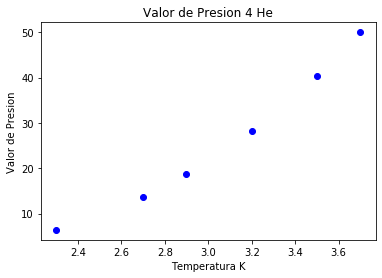

In [35]:
#Grafico de los datos
import matplotlib.pyplot as plt

plt.title("Valor de Presion 4 He")
plt.xlabel("Temperatura K")
plt.ylabel("Valor de Presion")
plt.plot(x, y, 'bo')
plt.show()

Ahora definiremos los polinomios

In [42]:
#Primera ecuacion lineal
#Para este caso recuerda que X = 3
X = float(input("Ingresar el valor de X :"))

def Y(X,X1,Y1,X2,Y2):
    return (X-X2)*(Y1)/(X1-X2) + (X - X1)*(Y2)/(X2-X1)

i = 0

while not (X<x[i+1]) and (X>x[i]):
    i += 1
    
print("Presion de Vapor a", X , " K ", Y(X,x[i],y[i],x[i+1],y[i+1]))

Ingresar el valor de X :3
Presion de Vapor a 3.0  K  21.87063333333333


In [53]:
#Segunda ecuacion
def Y2(X,X1,Y1,X2,Y2,X3,Y3):
    return (X-X2)*(X-X3)*(Y1)/((X1-X2)*(X1-X3)) + (X-X1)*(X-X3)*(Y2)/((X2-X1)*(X2-X3)) + (X-X1)*(X-X2)*(Y3)/((X3-X1)*(X3-X2))

print("Presion de Vapor a ", X , "K", Y2(X,x[1],y[1],x[2],y[2],x[3],y[3]))

Presion de Vapor a  3.0 K 21.60362


In [32]:
import sympy as sym
#Polinomio de lagrange 
n = len(x)
PolLagrange = 0.0
Z = sym.Symbol('Z')


for i in range(0,n):
    lm = 1.0
    for j in range(0,n):
        if (j!=i):
            lm = lm*(Z-x[j])/(x[i] - x[j])
            
    PolLagrange += lm*y[i]
            
        
#La forma mas facil de convertir una expresion Sympy en una expresion que puede evaluarese numericamente es usa la funcion labdify
pZ = sym.expand(PolLagrange)
print(pZ)


0.00986552028120968*Z**5 - 0.493264991164324*Z**4 + 6.25249999991502*Z**3 - 18.6736784610548*Z**2 + 23.050446235342*Z - 10.7527166665532


In [36]:
X = 3.0
pZn = sym.lambdify(Z,PolLagrange)
print(pZn(X))

21.595873032407685


[2.3 2.7 2.9 3.2 3.5 3.7]
2.3
3.7


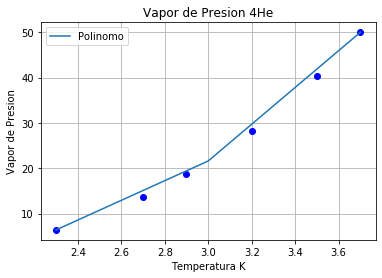

In [48]:
#Puntos para la grafica
print(x)
x_a = np.min(x)
x_b = np.max(x)

print(x_a)
print(x_b)

muestras = 3 #Entre mayor sea la muestra mejor sera la aproximacion intentemos con muestra = 100
xi_p = np.linspace(x_a, x_b, muestras)
yi_p = pZn(xi_p)

plt.plot(x,y,'bo')
plt.title("Vapor de Presion 4He")
plt.xlabel("Temperatura K")
plt.ylabel("Vapor de Presion")
plt.grid(True)

plt.plot(xi_p, yi_p, label = "Polinomo")
plt.legend()
plt.show()
